# Assignment 4

The assignment 4 contains 3 questions and the due date is May 14th (Tuesday) 23:59PM.

## Question 1 The “Business Decision”

We consider the core decision of an MBA admissions committee: *which applicants should we accept in the MBA program?* The school is interested in predicting the MBA participant’s success in the future before offering admission. 

To make this decision, the committee uses a number of data about the applicants. Let us consider for example the following attributes in evaluating an MBA application (of course in practice many more can be considered):

1. GPA
2. GMAT score
3. Scholarships, fellowships won
4. Evidence of Communications skills (debating competition, personal interview score)
5. Prior Job Experience
6. Organizational Experience
7. Other extra curricular achievements

Let us assume that this data is converted into a numerical scale from 1-7. For example: a numerical rating may be given to the fellowships based on the prestige and the number of fellowships won. Job experience may be rated on the number of years on the job, with a numerical weighting for the level of the job in the managerial ladder.

In particular, theory may suggest that there are really one or two basic factors (like intelligence and leadership skills) that lead to success in a management career. The various attributes are really different manifestations of these basic factors. But maybe there are other **hidden derived variables (factors)** in the data we have: instead of us manually combining raw attributes into meaningful derived ones, which not only is difficult with many data but also dangerous as we impose our biases, let’s get factor analysis to do the job for us - and use our intuition and judgment in the process.

### Question 1.1 (10 points)
Read the data from MBAadmin.csv and check the descriptive statistics of the data. **Implement yourself the principal component analysis** and derive 2 principal components and show how much of the variances can be explained by these 2 principal components.

In [0]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

mba = pd.read_csv('MBAadmin.csv')

In [2]:
mba.head()

,GPA,GMAT,Fellow,Comm,Job.Ex,Organze,Extra
0,3.0,580,2.0,3.5,5,3.8,4.0
1,3.2,570,2.0,3.8,6,3.8,3.8
2,3.7,690,3.0,3.3,3,3.2,3.6
3,3.9,760,3.0,3.8,5,3.9,3.2
4,2.8,480,2.0,3.2,6,3.8,3.8


In [3]:
M = np.mean(mba.T, axis=1)
print(M)

GPA          3.305
GMAT       583.500
Fellow       2.450
Comm         3.335
Job.Ex       4.250
Organze      3.200
Extra        3.300
dtype: float64


In [4]:
C = mba-M
print(C)

      GPA   GMAT  Fellow   Comm  Job.Ex  Organze  Extra
0  -0.305   -3.5   -0.45  0.165    0.75      0.6    0.7
1  -0.105  -13.5   -0.45  0.465    1.75      0.6    0.5
2   0.395  106.5    0.55 -0.035   -1.25      0.0    0.3
3   0.595  176.5    0.55  0.465    0.75      0.7   -0.1
4  -0.505 -103.5   -0.45 -0.135    1.75      0.6    0.5
5   0.095  -63.5    0.05 -0.735   -2.25     -0.7   -0.9
6   0.295   86.5    0.55  0.365   -0.25      0.3   -0.4
7   0.295  176.5    0.55  0.565    0.75      0.1   -0.1
8  -0.505 -203.5   -1.45 -1.335   -1.25     -0.3   -0.2
9   0.295  -23.5    0.55 -0.535   -2.25     -2.2   -0.5
10 -0.505 -103.5   -0.45 -0.135   -0.25      0.2    0.4
11  0.295    6.5    0.95  0.065    0.75      0.5    0.3
12  0.495  136.5    1.35  0.465    1.75      0.6    0.4
13  0.195   96.5    0.55  0.265    1.75      0.2    0.5
14  0.595  116.5    1.25  0.465   -2.25     -1.1   -0.6
15 -0.005  -23.5    0.35  0.065    0.75      0.6   -0.6
16 -0.505 -143.5   -1.45 -0.035    0.75      0.3

In [5]:
V = np.cov(C.T)
print(V)

[[ 2.19447368e-01  5.02447368e+01  3.91842105e-01  1.27184211e-01
   1.09210526e-01 -1.05263158e-02  2.63157895e-03]
 [ 5.02447368e+01  1.42660526e+04  9.27631579e+01  4.56605263e+01
   5.96052632e+01  1.64736842e+01  9.84210526e+00]
 [ 3.91842105e-01  9.27631579e+01  8.19473684e-01  2.59210526e-01
   2.50000000e-01  7.36842105e-03  1.00000000e-02]
 [ 1.27184211e-01  4.56605263e+01  2.59210526e-01  2.39236842e-01
   4.43421053e-01  1.70526316e-01  9.84210526e-02]
 [ 1.09210526e-01  5.96052632e+01  2.50000000e-01  4.43421053e-01
   2.30263158e+00  8.94736842e-01  6.00000000e-01]
 [-1.05263158e-02  1.64736842e+01  7.36842105e-03  1.70526316e-01
   8.94736842e-01  5.40000000e-01  2.31052632e-01]
 [ 2.63157895e-03  9.84210526e+00  1.00000000e-02  9.84210526e-02
   6.00000000e-01  2.31052632e-01  2.65263158e-01]]


In [6]:
from numpy.linalg import eig

values, vectors = eig(V)
print(f'Vectors: {vectors} \n')
print(f'Eigenvalues: {values}')

Vectors: [[ 3.52182669e-03 -5.09143931e-02  2.82598927e-01  9.25183466e-01
  -4.98958876e-02 -2.38496315e-01  4.68895552e-02]
 [ 9.99957901e-01 -3.98033844e-03 -6.68762886e-03 -2.60590696e-03
   2.74833430e-03 -3.03809934e-03 -2.32911014e-04]
 [ 6.50215184e-03 -7.48307220e-02  8.31162755e-01 -2.32935386e-01
  -4.18531936e-01  2.17153225e-01  1.64143720e-01]
 [ 3.20058937e-03  1.13869857e-01 -1.18804656e-01  2.90049368e-01
  -2.71225868e-03  9.27484681e-01 -1.68952774e-01]
 [ 4.17860740e-03  8.77815403e-01  2.60315362e-01 -3.61033596e-02
   1.85782369e-01 -1.23205310e-01 -3.32656700e-01]
 [ 1.15495732e-03  3.82623391e-01 -3.82569433e-01  6.40419888e-02
  -7.84171369e-01 -6.55353757e-02  2.89685412e-01]
 [ 6.90044307e-04  2.48727479e-01  3.19936159e-02  1.53754675e-02
   4.15796446e-01  1.27485244e-01  8.64716715e-01]] 

Eigenvalues: [1.42672538e+04 2.62224187e+00 2.44559826e-01 1.41974479e-02
 1.51626763e-01 6.02302398e-02 9.20070444e-02]


In [0]:
variance = (values[0]+values[1])/sum(values)

In [8]:
eig_pairs = [(np.abs(values[i]), vectors[:,i]) for i in range(len(values))]

eig_pairs.sort()
eig_pairs.reverse()

matrix_w = np.hstack((eig_pairs[0][1].reshape(7,1), 
                      eig_pairs[1][1].reshape(7,1)))

print('Matrix W:\n', matrix_w)

Matrix W:
 [[ 3.52182669e-03 -5.09143931e-02]
 [ 9.99957901e-01 -3.98033844e-03]
 [ 6.50215184e-03 -7.48307220e-02]
 [ 3.20058937e-03  1.13869857e-01]
 [ 4.17860740e-03  8.77815403e-01]
 [ 1.15495732e-03  3.82623391e-01]
 [ 6.90044307e-04  2.48727479e-01]]


In [9]:
Y = C.dot(matrix_w)
print(Y)

             0         1
0    -3.499015  1.143967
1   -13.492889  2.035819
2   106.495356 -1.511811
3   176.503603  0.180294
4  -103.492429  2.346093
5   -63.509851 -2.306297
6    86.501168 -0.563071
7   176.502173 -0.022619
8  -203.512620 -0.469603
9   -23.508396 -2.964779
10 -103.501317  0.412540
11    6.511069  0.819712
12  136.514545  1.248651
13   96.508937  1.332053
14  116.495721 -3.079799
15  -23.493132  0.813702
16 -143.501452  1.598922
17 -153.512168 -0.501309
18 -163.518086 -1.779072
19   96.508782  1.266607


In [10]:
print(f'The new reduced dataset with the 2 main components explains {round(variance*100,4)}% of the variance.')

The new reduced dataset with the 2 main components explains 99.9961% of the variance.


### Question 1.2 (10 points)

Now use the sklearn.decomposition.PCA to perform principal component analysis on the data and explain which number of principal components should be chosen using Elbow method. 

In [0]:
X = C.copy()

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
y_pca = pca.fit_transform(X)

In [12]:
y_pca

array([[ 3.49901472e+00, -1.14396725e+00],
       [ 1.34928886e+01, -2.03581862e+00],
       [-1.06495356e+02,  1.51181058e+00],
       [-1.76503603e+02, -1.80293966e-01],
       [ 1.03492429e+02, -2.34609292e+00],
       [ 6.35098509e+01,  2.30629702e+00],
       [-8.65011676e+01,  5.63071245e-01],
       [-1.76502173e+02,  2.26187652e-02],
       [ 2.03512620e+02,  4.69602838e-01],
       [ 2.35083957e+01,  2.96477892e+00],
       [ 1.03501317e+02, -4.12540010e-01],
       [-6.51106883e+00, -8.19711901e-01],
       [-1.36514545e+02, -1.24865117e+00],
       [-9.65089371e+01, -1.33205302e+00],
       [-1.16495721e+02,  3.07979929e+00],
       [ 2.34931316e+01, -8.13702413e-01],
       [ 1.43501452e+02, -1.59892175e+00],
       [ 1.53512168e+02,  5.01309417e-01],
       [ 1.63518086e+02,  1.77907210e+00],
       [-9.65087823e+01, -1.26660716e+00]])

In [0]:
n_components = np.arange(1,8)

data = C.copy()
pca1 = PCA(n_components=7)
y_pca1 = pca1.fit_transform(data)
variances = pca1.explained_variance_ratio_

In [14]:
variances

array([9.99776821e-01, 1.83753417e-04, 1.71375129e-05, 1.06252349e-05,
       6.44738725e-06, 4.22062988e-06, 9.94885178e-07])

In [15]:
n_components

array([1, 2, 3, 4, 5, 6, 7])

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

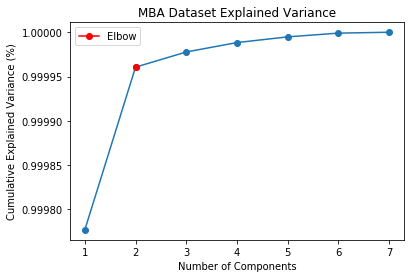

In [17]:
plt.figure()
plt.plot(n_components, np.cumsum(variances), marker='o')
plt.plot(2, np.cumsum(variances)[1], color='red', marker='o', label='Elbow')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance (%)') 
plt.title('MBA Dataset Explained Variance')
plt.legend()
plt.show()

As it can be seen from the graph above by the lebow method it should be chosen 2 components. This is because the marginal increase in explained variance from 2 to 3 is much less than from 1 to 2 components.

## Question 2 Customer Segmentation

The management team of a large shopping mall would like to understand the types of people who are, or could be, visiting their mall. They have good reasons to believe that there are a few different market segments, and they are considering designing and positioning the shopping mall services better in order to attract mainly a few profitable market segments, or to differentiate their services (e.g. invitations to events, discounts, etc) across market segments.

We aim to describe attitudes of people to shopping in a shopping mall using a small dataset. To make these decisions, the management team run a market research survey of a few potential customers. In this case this was a small survey to only a few people, where each person answered six attitudinal questions and a question regarding how often they visit the mall, all on a scale 1-7, as well as one question regarding their household income:

| Name        | Name           | Name  |
| ------------- |:-------------:| -----:|
| V1     | Shopping is fun | 1-7 |
| V2      | Shopping is bad for your budget      |  1-7 |
| V3 | I combine shopping with eating out      |    1-7 |
| V4     | I try to get the best buys while shopping | 1-7 |
| V5      | I don’t care about shopping      |  1-7 |
| V6 | You can save lot of money by comparing prices      |    1-7 |
| Income      | The household income of the respondent      |  Dollars |
| Mall.Visits | How often they visit the mall      |    1-7 |


In [0]:
X = pd.read_csv('Mall_Visits.csv')

In [19]:
X.head()

,ID,V1,V2,V3,V4,V5,V6,Income,Mall.Visits
0,1,6,4,7,3,2,3,60000,3
1,2,2,3,1,4,5,4,30000,1
2,3,7,2,6,4,1,3,70000,3
3,4,4,6,4,5,3,6,30000,7
4,5,1,3,2,2,6,4,60000,1


### Question 2.1 (10 points) 

Perform customer segmentation using k-Means algorithm by setting k=1. What can we infer from customer segmentation with one cluster? Explain this using the obtained centroid of cluster.

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [0]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [0]:
clt = KMeans(n_clusters=1, random_state=0, n_jobs=-1)
model = clt.fit(X_std)

In [23]:
model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [24]:
model.cluster_centers_

array([[ 8.88178420e-17, -9.43689571e-17,  3.27515792e-16,
        -8.04911693e-17,  2.27595720e-16, -6.66133815e-17,
         2.05391260e-16,  0.00000000e+00, -1.11022302e-17]])

### Question 2.2 (10 points)

Now perform customer segmentation by setting the number of k to be 3. Explain the obtained clusters. Check the distribution of each feature across the clusters and see whether these features are statisically significantly different from each other. 

In [0]:
clt = KMeans(n_clusters=3, random_state=0, n_jobs=-1)
model = clt.fit(X_std)

In [26]:
model.labels_

array([1, 2, 1, 0, 2, 1, 1, 1, 2, 0, 2, 1, 2, 0, 1, 0, 1, 0, 0, 2, 1, 2,
       1, 0, 2, 1, 1, 1, 2, 0, 2, 1, 2, 0, 1, 0, 1, 0, 0, 2], dtype=int32)

In [27]:
model.cluster_centers_

array([[ 2.59888849e-01, -1.89051145e-01,  1.26081448e+00,
        -3.14384524e-01,  1.28390102e+00,  2.91234686e-02,
         1.13122543e+00, -8.92156863e-01,  1.17170020e+00],
       [-1.62430531e-01,  1.02627765e+00, -3.45511660e-01,
         1.04511612e+00, -6.58843944e-01, -9.17389259e-01,
        -3.25655806e-01,  8.23529412e-01, -2.98372438e-17],
       [-4.33148082e-02, -1.17931905e+00, -8.00132264e-01,
        -1.07910364e+00, -4.05442427e-01,  1.19406221e+00,
        -6.97017690e-01, -2.05882353e-01, -1.17170020e+00]])

### Question 2.3 (10 points)

Now perform customer segmentation by setting the number of k using the Elbow method and Silhouette score, respectively. Explain what would be the k you get from two methods.

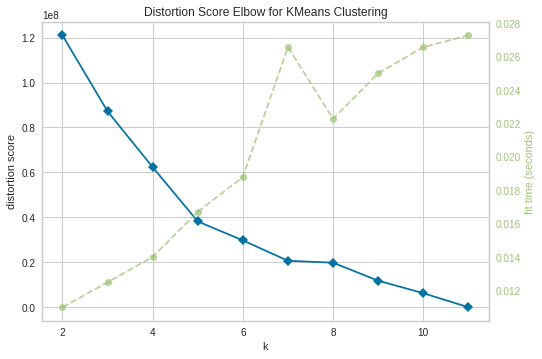

In [28]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,12))

visualizer.fit(X)   
visualizer.poof()  

In [30]:
from sklearn.metrics import silhouette_samples, silhouette_score
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.6831170918516033
For n_clusters = 3 The average silhouette_score is : 0.632690586868599
For n_clusters = 4 The average silhouette_score is : 0.646857953328938
For n_clusters = 5 The average silhouette_score is : 0.6789992858141238
For n_clusters = 6 The average silhouette_score is : 0.6881010819756159
For n_clusters = 7 The average silhouette_score is : 0.765189856691537
For n_clusters = 8 The average silhouette_score is : 0.8126052083141818
For n_clusters = 9 The average silhouette_score is : 0.8705608580666275
For n_clusters = 10 The average silhouette_score is : 0.9301424588149227
For n_clusters = 11 The average silhouette_score is : 0.9965424508175575
For n_clusters = 12 The average silhouette_score is : 0.891132301732419


## Question 3 Birds of a feather laugh together

Jester is a research project from the UC Berkeley Laboratory for Automation Science and Engineering. Users are asked to rate the jokes they read and may see more similar jokes. The dataset `jester_dataset.zip`, when unzipped, they are in Excel (.xls) format that contains ratings from 23,500 users who have rated 36 or more jokes. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated"). The text of the jokes is given `jester_dataset_joke_text.zip`. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

In [0]:
X = pd.read_excel('jester-data-2.xls', header=None)

In [197]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,50,99.00,8.11,99.00,99.0,-2.28,-4.22,5.49,-2.62,99.00,...,99.00,99.0,99.00,99.00,99.00,-5.92,99.0,99.00,99.00,99.00
1,100,-4.37,-3.88,0.73,-3.2,-6.41,1.17,7.82,-4.76,-6.41,...,5.73,-6.7,1.99,2.62,-0.49,3.45,3.2,-0.53,-0.53,-2.96
2,42,99.00,99.00,99.00,99.0,0.73,99.00,5.53,3.25,99.00,...,99.00,99.0,99.00,99.00,3.16,99.00,99.0,99.00,99.00,99.00
3,65,0.34,-6.55,2.86,99.0,-3.64,1.12,5.34,2.33,99.00,...,99.00,99.0,99.00,99.00,99.00,99.00,99.0,99.00,99.00,99.00
4,37,99.00,99.00,99.00,99.0,9.13,99.00,-9.32,-2.04,99.00,...,99.00,99.0,99.00,99.00,99.00,99.00,99.0,99.00,99.00,99.00


In [0]:
#X_user = pd.DataFrame(X[0])
X_jokes = X.iloc[:,1:]
X_jokes.replace(99,np.nan, inplace=True)

In [0]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()

X_std = pd.DataFrame(std.fit_transform(X_jokes), columns=np.arange(1,101))

In [0]:
X_std.replace(np.nan,0, inplace=True)
#X = X_std.set_index(X_user[0])

### Question 3.1 (10 points) 

Build a user-based collaborative filtering and provide a list of top 5 jokes for the first user. Check the text of jokes to see if the recommendations are sensible. 

Done with the help of the following tutorial: https://medium.com/@sam.mail2me/recommendation-systems-collaborative-filtering-just-with-numpy-and-pandas-a-z-fa9868a95da2

In [0]:
allusers = X_std.values
user0 = allusers[0]
denominator1 = np.sqrt(sum(np.square(x) for x in user0))

In [0]:
cosinesimilarity = [(0,1)]
i = 1

In [0]:
for user in allusers[1:]:
  numerator = [x*y for x,y in zip(user0, user)]
  denominator2 = np.sqrt(sum([np.square(x) for x in user]))
  costheta = sum(numerator) / (denominator1 * denominator2)
  cosinesimilarity.append((X_std.index[i], costheta))
  i += 1

In [0]:
cosinesimilarity.sort(key=lambda x: x[1], reverse=True)

In [206]:
similar5users = cosinesimilarity[0:5]
similar5users

[(0, 1),
 (3931, 0.40697082142040164),
 (17438, 0.4066215415413228),
 (1804, 0.39219182907137934),
 (15620, 0.38526728652331527)]

In [0]:
top5users = pd.DataFrame()

for user in similar5users:
  top5users = top5users.append(X_std.loc[user[0]])
  
top5users['costheta'] = [user[1] for user in similar5users]

all_values = top5users.values

In [208]:
top5users

,1,2,3,4,5,6,7,8,9,10,...,92,93,94,95,96,97,98,99,100,costheta
0,0.0,1.414438,0.0,0.0,-0.454627,-1.044665,1.068536,-0.385514,0.0,-0.630389,...,0.0,0.0,0.0,0.0,-1.509023,0.0,0.0,0.000000,0.0,1.000000
3931,0.0,0.000000,0.0,0.0,0.152940,0.000000,-1.585671,0.421018,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.004501,0.0,0.0,-1.623301,0.0,0.406971
17438,0.0,0.000000,0.0,0.0,-1.523567,0.476759,-1.108771,-0.898208,0.0,-1.928414,...,0.0,0.0,0.0,0.0,-2.126327,0.0,0.0,0.000000,0.0,0.406622
1804,0.0,0.000000,0.0,0.0,1.314913,0.000000,-0.771190,-1.271078,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.392192
15620,0.0,0.000000,0.0,0.0,0.401663,0.000000,-1.473144,-1.842540,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.385267


In [0]:
denominator = sum([x[1] for x in similar5users])

inx = 0
values = []

for x in top5users.loc[0]:
  totalsum = 0
  if x == 0.0:
    for v in range(1,5):
      totalsum += all_values[v-1][inx]*all_values[v-1][100]
    top5users.loc[0][inx+1] = totalsum / denominator
  inx += 1

In [211]:
toprecommend = []

for inx, x in enumerate(top5users.loc[0].values):
  if x >0.0:
    toprecommend.append((inx,x))
    
toprecommend.sort(key=lambda x: x[1], reverse=True)

toprecommend[:5]

[(1, 1.414437756097559),
 (47, 1.1526326275543874),
 (6, 1.0685361823219193),
 (30, 1.0283225801237028),
 (100, 1.0)]

### Question 3.2 (10 points) 

Build a item-based collaborative filtering and provide a list of top 5 jokes for the first user. Check the text of jokes to see if the recommendations are sensible.

https://stackabuse.com/creating-a-simple-recommender-system-in-python-using-pandas/
https://towardsdatascience.com/prototyping-a-recommender-system-step-by-step-part-1-knn-item-based-collaborative-filtering-637969614ea
https://github.com/KevinLiao159/MyDataSciencePortfolio/blob/master/movie_recommender/movie_recommendation_using_KNN.ipynb

### Question 3.3 (20 points) 

Now build a recommendation system using matrix factorization (singular value decomposition). Get a list of top 5 jokes for the first user. Explain whether model-based recoomendation approach is better than neighborhood-based approach. Write a function that takes the parameter of user_id and return the text of recommended jokes)

https://www.analyticsvidhya.com/blog/2018/06/comprehensive-guide-recommendation-engine-python/